# Lambda School Data Science Module 141
## Statistics, Probability, and Inference

## Prepare - examine what's available in SciPy

As we delve into statistics, we'll be using more libraries - in particular the [stats package from SciPy](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html).

In [0]:
from scipy import stats
dir(stats)

In [0]:
# As usual, lots of stuff here! There's our friend, the normal distribution
norm = stats.norm()
print(norm.mean())
print(norm.std())
print(norm.var())

0.0
1.0
1.0


In [0]:
# And a new friend - t
t1 = stats.t(5)  # 5 is df "shape" parameter
print(t1.mean())
print(t1.std())
print(t1.var())

0.0
1.2909944487358056
1.6666666666666667


![T distribution PDF with different shape parameters](https://upload.wikimedia.org/wikipedia/commons/4/41/Student_t_pdf.svg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/Student's_t-distribution#/media/File:Student_t_pdf.svg))*

The t-distribution is "normal-ish" - the larger the parameter (which reflects its degrees of freedom - more input data/features will increase it), the closer to true normal.

In [0]:
t2 = stats.t(30)  # Will be closer to normal
print(t2.mean())
print(t2.std())
print(t2.var())

0.0
1.0350983390135313
1.0714285714285714


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal in the limit (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

History sidenote - this is "Student":

![William Sealy Gosset](https://upload.wikimedia.org/wikipedia/commons/4/42/William_Sealy_Gosset.jpg)

*(Picture from [Wikipedia](https://en.wikipedia.org/wiki/File:William_Sealy_Gosset.jpg))*

His real name is William Sealy Gosset, and he published under the pen name "Student" because he was not an academic. He was a brewer, working at Guinness and using trial and error to determine the best ways to yield barley. He's also proof that, even 100 years ago, you don't need official credentials to do real data science!

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test.

In [1]:
# TODO - during class, but please help!
survey_data = [0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
               0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
               1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0]

import numpy as np
import pandas as pd

df = pd.DataFrame(survey_data)
df.describe()

,0
count,50.000000
mean,0.660000
std,0.478518
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


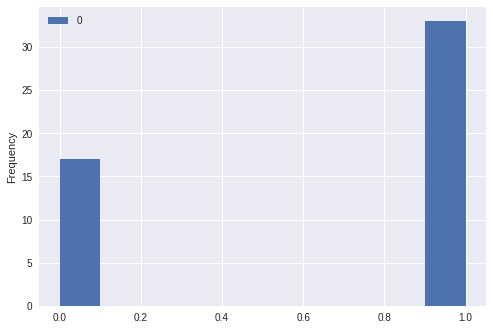

In [2]:
df.plot.hist()

### Student t-distribution applet 

Showing t-statistic data point outputing probability mass under curve, assuming unbiased (mean=0) normal distribution. When probability mass is less than pvalue=0.05%, then null hypothesis can be rejected as random outlier.

https://homepage.stat.uiowa.edu/~mbognar/applets/t.html

In [3]:
# Now with confidence!

import scipy

# 0.5 indicate unbiased hypothesis probability of
# equal 50% chance of liking coke or pepsi
# However df.mean()=0.66, indicate under no biased influence, 
# 0.66 people like pepsi over coke.
scipy.stats.ttest_1samp(survey_data, 0.5) 

# statistic value (2.364) at point value under fair (0.5) normal distribution,
# the probability mass is 2.2%, which is less than pvalue of 5%
# Therefore null hypothesis of no biased random chance of 2.2%, can be rejected.
# In other word, the survey_data can be accepted with more than 95% confidence.

Ttest_1sampResult(statistic=2.364321853156195, pvalue=0.02207003200903075)

In [4]:
# the t-statistic is the ratio of the departure of the estimated value of  a
# parameter from its hypothesized value to its standard error

# We want to calculate: tstat = 2.364321853156195
# df.std() = 0.478518
# standard deviation is not adjusted to standard error, meaning the big sample
# size, the bigger the stardard deviation.
# stderr - adjust for error. Sample size variation does not affect its value.

sample_stderr = 0.478518 / np.sqrt(len(survey_data))
sample_mean = 0.660000
null_hypothesis_mean = 0.5

t_stat = (sample_mean - null_hypothesis_mean) / sample_stderr
print(t_stat)

2.364322449518046


In [5]:
len(survey_data)

50

In [0]:
# Science! Reproducibility...
import random

def make_soda_data(n=50):
  # Fair version
  # return pd.DataFrame([random.randint(0, 1) for _ in range(n)])
  # Unfair version!
  return pd.DataFrame(np.random.binomial(n=1, p=0.5, size=n))

In [7]:
make_soda_data(n=500).describe()

,0
count,500.000000
mean,0.522000
std,0.500016
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [8]:
t_statistics = []
p_values = []
n_experiments = 10  # Number of visitors

for _ in range(n_experiments):
  df = make_soda_data(n=500000)
  ttest = scipy.stats.ttest_1samp(df, 0.5)
  t_statistics.append(ttest.statistic)
  p_values.append(ttest.pvalue)

pd.DataFrame(t_statistics).describe()

,0
count,10.000000
mean,-0.157544
std,1.072917
min,-1.507554
25%,-1.219053
50%,-0.100409
75%,0.811051
max,1.244509


In [9]:
pd.DataFrame(p_values).describe()


,0
count,10.000000
mean,0.372550
std,0.223432
min,0.131669
25%,0.210985
50%,0.301483
75%,0.451985
max,0.820988


In [11]:
random.choice([0,1,1]) # 0.666 unfairness favouring 1

1

In [12]:
np.random.binomial(100,0.7) # 70% biased favouring 1 out of 100 trials

72

In [13]:
np.random.binomial(1,0.7) # 70% biased out 1 trial

1

## Assignment - apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [16]:
# TODO - your code here!
import pandas as pd
import numpy as np

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', 
                 na_values=['?'],
                 header=None)

column_names = [
                     'party',
                      'handicapped_infants',
                      'water_proj',
                      'budget_resolution',
                      'physician_fee',
                      'elsalvador_aid',
                      'religious_schools',
                      'antiban_satellite',
                      'nicaraguan_aid',
                      'mx_missile',
                      'immigration',
                      'synfuels-cutback'
                      'education_spending',
                      'superfund_sue',
                      'crime',
                      'duty_free',
                      'safrica_export'
                   ]
                
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [21]:
df.fillna(0, inplace=True)
df.replace('y',1, inplace=True)
df.replace('n',-1, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,-1,1,-1,1,1,1,-1,-1,-1,1,0,1,1,1,-1,1
1,republican,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,0
2,democrat,0,1,1,0,1,1,-1,-1,-1,-1,1,-1,1,1,-1,-1
3,democrat,-1,1,1,-1,0,1,-1,-1,-1,-1,1,-1,1,-1,-1,1
4,democrat,1,1,1,-1,1,1,-1,-1,-1,-1,1,0,1,1,1,1


In [22]:
rvotes = df[df[0] == 'republican']
rvotes.shape

(168, 17)

In [23]:
dvotes = df[ df[0] == 'democrat']
dvotes.shape

(267, 17)

In [25]:
votes = df.groupby(df[0]).sum()
votes.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,,,,,,,,,,,,,,,,
democrat,54,1,202,-231,-145,-12,141,173,128,-15,3,-177,-106,-77,69,161
republican,-103,2,-120,161,149,132,-84,-109,-127,19,-117,115,114,155,-128,46


In [68]:
d_issues=votes.loc['democrat'].abs() > votes.loc['republican'].abs()
r_issues=votes.loc['democrat'].abs() < votes.loc['republican'].abs()
d_issues

1     False
2     False
3      True
4      True
5     False
6     False
7      True
8      True
9      True
10    False
11    False
12     True
13    False
14    False
15    False
16     True
dtype: bool

In [0]:
vote.columns = colname

In [74]:
vote.iat[0,1]

1

### T Test (Student Test)
Null hypothesis of T Test is based on normal distribution centered at 0.5 (no biased).
* mean = 0.5
* std = 1.0
* var = 1.0
* statistic = 1.96 , pvalue = 0.05

Sample T test return (statistics, pvalue)
* statistic = data point value under normal distribution where pvalue is currently showing.
* pvalue = tail area under normal distribution where statistic data point value is pointing.

### One sample t test
*  The observed mean (from a single sample) is compared to an expected mean of 
population.

## Two sample test
*  One sample compares to another sample.

### Dependent sample t test
*   Sample related to members of other samples.
*   Within group variation.
*   Two groups of measurements are based on the same sample observation. 
*   Eg before and after treatment of a drug on a patient.



### Independent t test
*  Sample unrelated to members of other samples.
*  Differences in means between two groups.
*  Eg blood pressure treatment of patients vs control group who receives placebo.

### Independent voting


*   Democrate voting is independent of Republican voting on any particular issues.
*   Independent t test : ttest_ind



In [0]:
from scipy.stats import ttest_ind



In [83]:
result = pd.DataFrame(columns=['issues','statistic','pvalue'])

for i in range(1,16):
  t,p = ttest_ind(rvotes[i], dvotes[i])
  result.loc[i] = [column_names[i],t,p]
  
result.head()

,issues,statistic,pvalue
1,handicapped_infants,-9.223178,1.276117e-18
2,water_proj,0.087646,9.301989e-01
3,budget_resolution,-22.821693,2.872115e-76
4,physician_fee,46.101910,3.967141e-169
5,elsalvador_aid,20.895617,1.465966e-67


In [84]:
'''
Adding democrat & republic issues dataframe column to existing result dataframe
'''
result['d_issues'] = d_issues
result['r_issues'] = r_issues
result


,issues,statistic,pvalue,d_issues,r_issues
1,handicapped_infants,-9.223178,1.276117e-18,False,True
2,water_proj,0.087646,9.301989e-01,False,True
3,budget_resolution,-22.821693,2.872115e-76,True,False
4,physician_fee,46.101910,3.967141e-169,True,False
5,elsalvador_aid,20.895617,1.465966e-67,False,True
6,religious_schools,9.815876,1.142999e-20,False,True
7,antiban_satellite,-12.448556,1.273630e-30,True,False
8,nicaraguan_aid,-17.791848,1.494801e-53,True,False
9,mx_missile,-16.326540,4.863267e-47,True,False
10,immigration,1.735017,8.344940e-02,False,True


In [85]:
'''
pvalue > 0.01
No much different from democrat nor republican support, liken coin flip.
Null hypothesis of random chance accepted.
Therefore party support for this issue can not be trusted.
'''
result[result['pvalue'] > 0.01]

,issues,statistic,pvalue,d_issues,r_issues
2,water_proj,0.087646,0.930199,False,True
10,immigration,1.735017,0.083449,False,True


In [90]:
'''
Democrat supported issues
'''
result[ result['d_issues'] & result['pvalue'] < 0.01 ] 

,issues,statistic,pvalue,d_issues,r_issues
1,handicapped_infants,-9.223178,1.276117e-18,False,True
2,water_proj,0.087646,9.301989e-01,False,True
5,elsalvador_aid,20.895617,1.465966e-67,False,True
6,religious_schools,9.815876,1.142999e-20,False,True
10,immigration,1.735017,8.344940e-02,False,True
11,synfuels-cutbackeducation_spending,-8.200712,2.743404e-15,False,True
13,crime,13.333130,3.204800e-34,False,True
14,duty_free,16.094539,5.095590e-46,False,True
15,safrica_export,-12.624783,2.492767e-31,False,True


In [88]:
'''
Republic Supported issues
'''
result[ result['r_issues'] & result['pvalue'] < 0.01 ]


,issues,statistic,pvalue,d_issues,r_issues
3,budget_resolution,-22.821693,2.872115e-76,True,False
4,physician_fee,46.101910,3.967141e-169,True,False
7,antiban_satellite,-12.448556,1.273630e-30,True,False
8,nicaraguan_aid,-17.791848,1.494801e-53,True,False
9,mx_missile,-16.326540,4.863267e-47,True,False
12,superfund_sue,19.744624,2.383628e-62,True,False
